# K-MEANS CLUSTER 2,3 DAN 4

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


## Bagian Awal: Ambil dan Gabungkan Data

Kode Python ini terhubung ke dua database berbeda—PostgreSQL dan MySQL—menggunakan pustaka psycopg2 dan pymysql, lalu mengambil data dari tabel sepaliris (PostgreSQL) dan petaliris (MySQL). Data dari kedua tabel tersebut dimuat ke dalam DataFrame menggunakan pandas, kemudian digabungkan berdasarkan kolom id dan class dengan metode inner join, yang berarti hanya data yang memiliki kecocokan di kedua tabel pada kolom tersebut yang akan disertakan. Setelah penggabungan, hasil akhir ditampilkan di konsol tanpa menampilkan indeks baris. Kode ini memungkinkan analisis gabungan data kelopak dan sepal dari dua sumber database yang berbeda.

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

## data asli sebelum di normalisasi

Kode tersebut menggunakan pustaka matplotlib.pyplot dan mengambil data numerik dari DataFrame df_merged dengan cara menghapus kolom non-numerik yaitu 'id' dan 'class', kemudian mencetak hasilnya ke layar menggunakan print. Langkah ini biasanya dilakukan sebagai persiapan sebelum analisis lebih lanjut seperti normalisasi, reduksi dimensi, atau visualisasi data, karena hanya fitur numerik yang bisa diproses oleh algoritma tersebut.

In [3]:
import matplotlib.pyplot as plt

# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling);


     petal_length  petal_width  sepal_length  sepal_width
0             1.4          0.2           5.1          3.5
1            14.0          2.0          40.9         30.0
2             1.3          0.2           4.7          3.2
3            15.0         20.0          46.0         31.0
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


## Visualisasi data asli

Kode tersebut melakukan visualisasi data menggunakan Principal Component Analysis (PCA) tanpa proses normalisasi terlebih dahulu. Pertama, kode menghapus kolom non-numerik seperti 'id' dan 'class' dari DataFrame df_merged, karena PCA hanya dapat diterapkan pada data numerik. Kemudian, PCA diterapkan untuk mereduksi dimensi data ke dua komponen utama (n_components=2), sehingga menghasilkan representasi dua dimensi dari data asli. Hasil reduksi ini disimpan dalam reduced_raw dan divisualisasikan menggunakan scatter plot, di mana setiap titik berwarna biru merepresentasikan satu sampel data dalam ruang dua dimensi PCA. Visualisasi ini membantu memahami struktur dan distribusi data mentah sebelum dilakukan normalisasi.

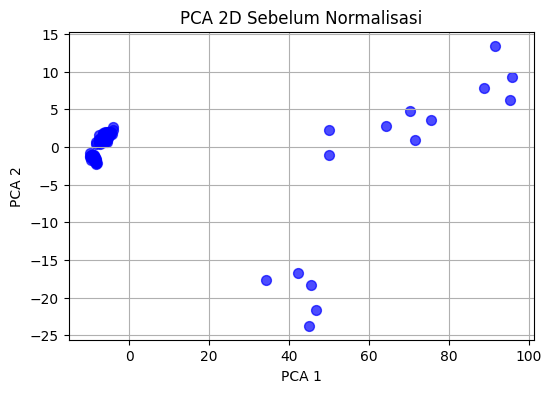

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])


# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("PCA 2D Sebelum Normalisasi")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Kode ini melakukan visualisasi data dalam ruang 3 dimensi menggunakan PCA (Principal Component Analysis) tanpa proses normalisasi sebelumnya. Pertama, data numerik dipilih dengan menghapus kolom non-numerik seperti id dan class dari DataFrame df_merged. Kemudian, PCA diterapkan untuk mereduksi dimensi data menjadi tiga komponen utama. Hasil reduksi ini divisualisasikan dalam grafik scatter 3D menggunakan matplotlib, dengan titik-titik berwarna biru yang merepresentasikan distribusi data dalam ruang PCA. Visualisasi ini membantu untuk memahami pola dan struktur data dalam dimensi yang lebih rendah sebelum proses normalisasi dilakukan.

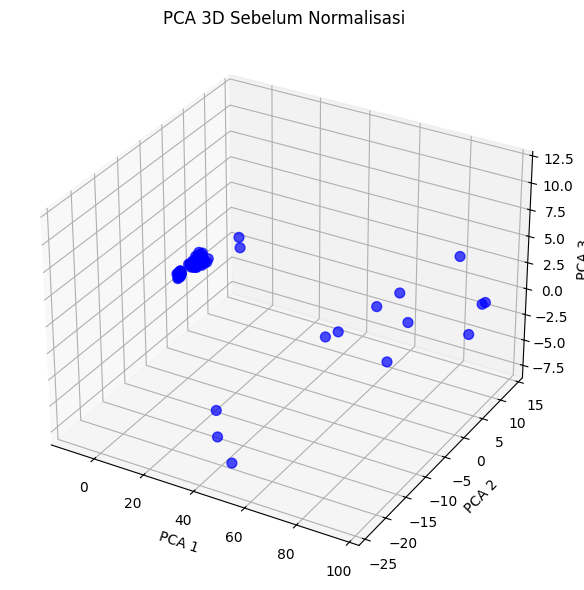

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("PCA 3D Sebelum Normalisasi")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

Kode ini melakukan proses pra-pemrosesan data dengan cara pertama-tama menghapus kolom non-numerik ('id' dan 'class') dari DataFrame df_merged untuk mendapatkan hanya fitur numerik yang akan dianalisis. Selanjutnya, fitur-fitur tersebut dinormalisasi menggunakan StandardScaler agar memiliki nilai rata-rata 0 dan standar deviasi 1, yang penting untuk menghindari bias akibat perbedaan skala antar fitur. Setelah data ternormalisasi, dilakukan reduksi dimensi menggunakan PCA (Principal Component Analysis) dengan mengambil 2 komponen utama (n_components=2), sehingga menghasilkan representasi data berdimensi 2 yang siap untuk divisualisasikan atau dianalisis lebih lanjut.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


In [7]:
print (scaled_features);

[[-0.47336355 -0.4992233  -0.36768452 -0.27454238]
 [ 0.5357241  -0.11465756  1.78761061  2.8056325 ]
 [-0.48137218 -0.4992233  -0.39176603 -0.30941228]
 [ 0.61581042  3.73099981  2.09464986  2.92186551]
 [-0.47336355 -0.4992233  -0.3737049  -0.26291908]
 [-0.44933765 -0.45649377 -0.34962339 -0.22804917]
 [-0.47336355 -0.47785854 -0.39778641 -0.28616568]
 [-0.46535492 -0.4992233  -0.3737049  -0.28616568]
 [-0.47336355 -0.4992233  -0.40982716 -0.34428219]
 [-0.46535492 -0.52058806 -0.37972527 -0.32103559]
 [-0.46535492 -0.4992233  -0.34962339 -0.25129578]
 [ 0.69589674  3.73099981  2.2150574   3.27056455]
 [-0.47336355 -0.52058806 -0.38574565 -0.33265889]
 [-0.49738945 -0.52058806 -0.41584754 -0.33265889]
 [-0.48938081 -0.4992233  -0.32554188 -0.21642587]
 [-0.46535492 -0.45649377 -0.33156225 -0.16993267]
 [-0.48137218 -0.45649377 -0.34962339 -0.22804917]
 [-0.47336355 -0.47785854 -0.36768452 -0.27454238]
 [-0.44933765 -0.47785854 -0.33156225 -0.23967248]
 [-0.46535492 -0.47785854 -0.36

Kode ini melakukan pra-pemrosesan data dengan terlebih dahulu menghapus kolom non-numerik 'id' dan 'class' dari DataFrame df_merged, sehingga hanya menyisakan fitur-fitur numerik yang akan dianalisis. Kemudian, data dinormalisasi menggunakan MinMaxScaler, yang mengubah nilai setiap fitur ke dalam rentang 0 hingga 1 agar seluruh fitur berada pada skala yang seragam. Setelah proses normalisasi, data yang telah diskalakan direduksi dimensinya menggunakan PCA (Principal Component Analysis) menjadi 3 komponen utama (n_components=3), yang bertujuan untuk menyederhanakan kompleksitas data sambil tetap mempertahankan sebagian besar informasi penting, dan hasilnya disimpan dalam reduced_features untuk keperluan visualisasi atau analisis lebih lanjut.

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


In [9]:
print (scaled_features);

[[0.00606061 0.00401606 0.0107095  0.03631285]
 [0.1969697  0.07630522 0.48995984 0.77653631]
 [0.00454545 0.00401606 0.00535475 0.02793296]
 [0.21212121 0.79919679 0.55823293 0.80446927]
 [0.00606061 0.00401606 0.00937082 0.03910615]
 [0.01060606 0.01204819 0.01472557 0.04748603]
 [0.00606061 0.00803213 0.00401606 0.03351955]
 [0.00757576 0.00401606 0.00937082 0.03351955]
 [0.00606061 0.00401606 0.00133869 0.01955307]
 [0.00757576 0.         0.00803213 0.02513966]
 [0.00757576 0.00401606 0.01472557 0.04189944]
 [0.22727273 0.79919679 0.58500669 0.88826816]
 [0.00606061 0.         0.00669344 0.02234637]
 [0.00151515 0.         0.         0.02234637]
 [0.0030303  0.00401606 0.02008032 0.05027933]
 [0.00757576 0.01204819 0.01874163 0.06145251]
 [0.00454545 0.01204819 0.01472557 0.04748603]
 [0.00606061 0.00803213 0.0107095  0.03631285]
 [0.01060606 0.00803213 0.01874163 0.04469274]
 [0.00757576 0.00803213 0.0107095  0.04469274]
 [0.24242424 0.07630522 0.66532798 0.88826816]
 [0.21212121 

## Clustering (2 Cluster)


Kode ini menerapkan algoritma KMeans Clustering untuk mengelompokkan data yang telah dinormalisasi (scaled_features) menjadi 2 cluster. Proses dimulai dengan inisialisasi objek KMeans dengan 2 cluster dan parameter random_state untuk memastikan hasil yang konsisten, serta n_init=10 untuk menjalankan algoritma beberapa kali dengan inisialisasi berbeda. Setelah model dilatih, label hasil cluster disimpan dalam labels_2. Dua metrik evaluasi digunakan: inertia (jumlah kuadrat jarak antar titik dan pusat cluster) dan silhouette score (ukuran seberapa baik titik berada di dalam cluster). Hasil evaluasi ditampilkan di konsol. Terakhir, visualisasi hasil clustering ditampilkan dalam bentuk scatter plot 2D berdasarkan dua komponen utama hasil PCA (reduced_features), dengan warna berbeda untuk setiap cluster.

[2 Clusters] Inertia: 3.52, Silhouette Score: 0.9173


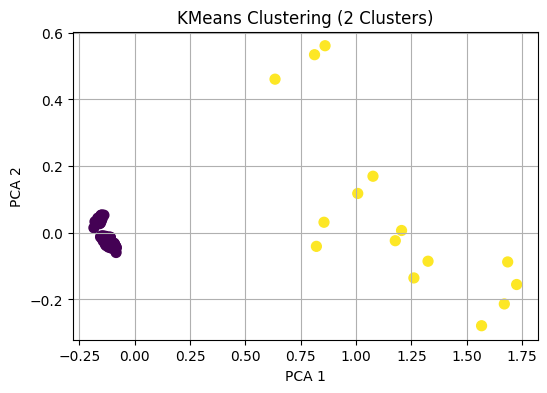

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Kode ini menggabungkan teknik Principal Component Analysis (PCA) dan KMeans Clustering untuk visualisasi data dalam ruang 3 dimensi. Pertama, data yang telah dinormalisasi (scaled_features) direduksi menjadi tiga komponen utama menggunakan PCA agar dapat divisualisasikan dalam bentuk 3D. Selanjutnya, algoritma KMeans diterapkan untuk membagi data menjadi dua cluster (n_clusters=2), dan hasil klasterisasi disimpan dalam labels_2. Evaluasi model dilakukan menggunakan dua metrik: inertia (untuk mengukur seberapa rapat data terhadap pusat cluster) dan silhouette score (untuk menilai kualitas pemisahan antar cluster). Hasil evaluasi ditampilkan di konsol. Akhirnya, visualisasi scatter plot 3D dibuat menggunakan matplotlib, di mana titik-titik diberi warna berdasarkan cluster-nya, memungkinkan pemahaman visual terhadap struktur cluster dalam ruang PCA 3D.

[2 Clusters] Inertia: 3.52, Silhouette Score: 0.9173


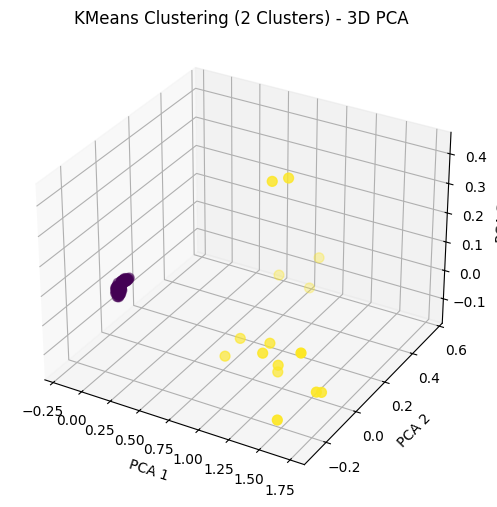

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## Clustering  (3 Cluster)

Kode ini menerapkan algoritma KMeans Clustering untuk membagi data yang telah dinormalisasi (scaled_features) ke dalam tiga kelompok (cluster). Algoritma KMeans diinisialisasi dengan n_clusters=3, dan hasil klasterisasi disimpan dalam variabel labels_3. Dua metrik evaluasi digunakan: inertia untuk mengukur total jarak kuadrat antara titik data dan pusat cluster, serta silhouette score untuk mengevaluasi seberapa baik data dikelompokkan berdasarkan jarak antar dan dalam cluster. Nilai dari kedua metrik ini ditampilkan di konsol sebagai indikator performa clustering. Hasil klasterisasi divisualisasikan dalam bentuk scatter plot 2D menggunakan dua komponen utama hasil PCA (reduced_features), dengan warna berbeda untuk setiap cluster agar pola pengelompokan dapat dilihat dengan jelas.

[3 Clusters] Inertia: 1.65, Silhouette Score: 0.9015


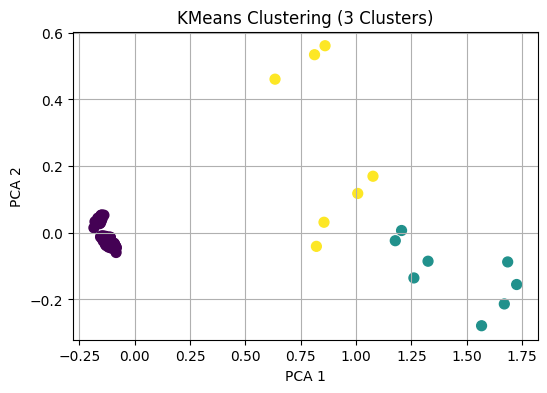

In [12]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Kode ini melakukan analisis dan visualisasi klasterisasi data dalam ruang tiga dimensi menggunakan kombinasi PCA (Principal Component Analysis) dan KMeans. Pertama, data yang telah dinormalisasi (scaled_features) direduksi menjadi tiga komponen utama menggunakan PCA untuk keperluan visualisasi 3D. Kemudian, algoritma KMeans diterapkan untuk membagi data menjadi tiga cluster (n_clusters=3), dengan hasil klasterisasi disimpan dalam labels_3. Kinerja model dievaluasi menggunakan metrik inertia dan silhouette score, yang ditampilkan di konsol untuk memberikan gambaran mengenai kepadatan dan kualitas pemisahan cluster. Visualisasi scatter plot 3D dibuat dengan matplotlib, menampilkan distribusi data dalam ruang PCA 3D dengan pewarnaan berdasarkan cluster, sehingga mempermudah dalam mengamati struktur pengelompokan data.

[3 Clusters] Inertia: 1.65, Silhouette Score: 0.9015


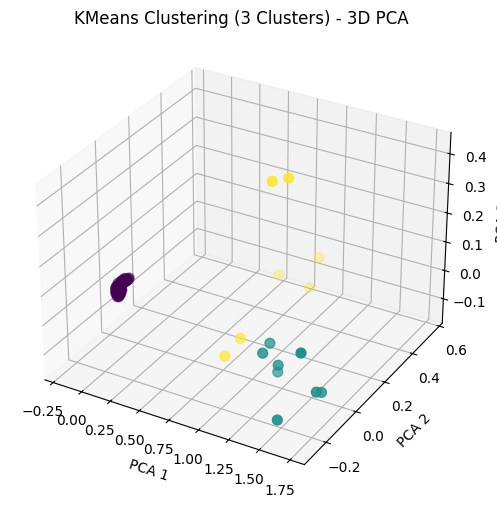

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## Clustering (4 Cluster)

Kode ini menjalankan algoritma KMeans Clustering untuk membagi data yang telah dinormalisasi (scaled_features) menjadi empat cluster (n_clusters=4). Setelah pelatihan, label hasil pengelompokan disimpan dalam labels_4. Dua metrik evaluasi digunakan: inertia yang menunjukkan total jarak kuadrat dari setiap titik ke pusat clusternya (menggambarkan kepadatan cluster), dan silhouette score yang menilai seberapa baik titik-titik berada dalam clusternya dibandingkan dengan cluster lain (semakin mendekati 1, semakin baik). Hasil evaluasi ditampilkan di konsol. Selanjutnya, hasil clustering divisualisasikan menggunakan scatter plot 2D berdasarkan dua komponen utama dari PCA (reduced_features), dengan pewarnaan yang merepresentasikan tiap cluster, sehingga memudahkan dalam mengamati pola pengelompokan data.

[4 Clusters] Inertia: 1.06, Silhouette Score: 0.9007


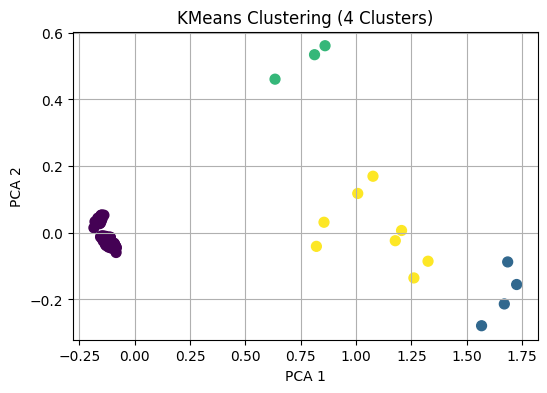

In [14]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
